In [251]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import warnings
from textblob import TextBlob
warnings.filterwarnings('ignore')

In [252]:
pip install wordcloud

In [253]:
df=pd.read_csv(r'/content/train_E6oV3lV.csv')

In [254]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [255]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [256]:
df.columns

Index(['id', 'label', 'tweet'], dtype='object')

In [257]:
df['tweet']

0         @user when a father is dysfunctional and is s...
1        @user @user thanks for #lyft credit i can't us...
2                                      bihday your majesty
3        #model   i love u take with u all the time in ...
4                   factsguide: society now    #motivation
                               ...                        
31957    ate @user isz that youuu?ðððððð...
31958      to see nina turner on the airwaves trying to...
31959    listening to sad songs on a monday morning otw...
31960    @user #sikh #temple vandalised in in #calgary,...
31961                     thank you @user for you follow  
Name: tweet, Length: 31962, dtype: object

Tweet Preproceccing

In [258]:
df['clean_tweet']=df['tweet'].str.replace('#','')
df[['tweet','clean_tweet']]

,tweet,clean_tweet
0,@user when a father is dysfunctional and is s...,@user when a father is dysfunctional and is s...
1,@user @user thanks for #lyft credit i can't us...,@user @user thanks for lyft credit i can't use...
2,bihday your majesty,bihday your majesty
3,#model i love u take with u all the time in ...,model i love u take with u all the time in u...
4,factsguide: society now #motivation,factsguide: society now motivation
...,...,...
31957,ate @user isz that youuu?ðððððð...,ate @user isz that youuu?ðððððð...
31958,to see nina turner on the airwaves trying to...,to see nina turner on the airwaves trying to...
31959,listening to sad songs on a monday morning otw...,listening to sad songs on a monday morning otw...
31960,"@user #sikh #temple vandalised in in #calgary,...","@user sikh temple vandalised in in calgary, ws..."


In [259]:
df['clean_tweet']=df['clean_tweet'].str.replace('@[\w]*',' ')
df[['tweet','clean_tweet']]

,tweet,clean_tweet
0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so se...
1,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit i can't use cause t...
2,bihday your majesty,bihday your majesty
3,#model i love u take with u all the time in ...,model i love u take with u all the time in u...
4,factsguide: society now #motivation,factsguide: society now motivation
...,...,...
31957,ate @user isz that youuu?ðððððð...,ate isz that youuu?ððððððð...
31958,to see nina turner on the airwaves trying to...,to see nina turner on the airwaves trying to...
31959,listening to sad songs on a monday morning otw...,listening to sad songs on a monday morning otw...
31960,"@user #sikh #temple vandalised in in #calgary,...","sikh temple vandalised in in calgary, wso co..."


In [260]:
pip install neattext


In [261]:
import neattext.functions as nfx

In [262]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [263]:
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_userhandles)
df[['tweet','clean_tweet']]

,tweet,clean_tweet
0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so se...
1,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit i can't use cause t...
2,bihday your majesty,bihday your majesty
3,#model i love u take with u all the time in ...,model i love u take with u all the time in u...
4,factsguide: society now #motivation,factsguide: society now motivation
...,...,...
31957,ate @user isz that youuu?ðððððð...,ate isz that youuu?ððððððð...
31958,to see nina turner on the airwaves trying to...,to see nina turner on the airwaves trying to...
31959,listening to sad songs on a monday morning otw...,listening to sad songs on a monday morning otw...
31960,"@user #sikh #temple vandalised in in #calgary,...","sikh temple vandalised in in calgary, wso co..."


In [264]:
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_multiple_spaces)
df[['tweet','clean_tweet']]

,tweet,clean_tweet
0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so self...
1,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit i can't use cause they...
2,bihday your majesty,bihday your majesty
3,#model i love u take with u all the time in ...,model i love u take with u all the time in urð...
4,factsguide: society now #motivation,factsguide: society now motivation
...,...,...
31957,ate @user isz that youuu?ðððððð...,ate isz that youuu?ððððððð...
31958,to see nina turner on the airwaves trying to...,to see nina turner on the airwaves trying to ...
31959,listening to sad songs on a monday morning otw...,listening to sad songs on a monday morning otw...
31960,"@user #sikh #temple vandalised in in #calgary,...","sikh temple vandalised in in calgary, wso con..."


In [265]:
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_urls)
df[['tweet','clean_tweet']]

,tweet,clean_tweet
0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so self...
1,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit i can't use cause they...
2,bihday your majesty,bihday your majesty
3,#model i love u take with u all the time in ...,model i love u take with u all the time in urð...
4,factsguide: society now #motivation,factsguide: society now motivation
...,...,...
31957,ate @user isz that youuu?ðððððð...,ate isz that youuu?ððððððð...
31958,to see nina turner on the airwaves trying to...,to see nina turner on the airwaves trying to ...
31959,listening to sad songs on a monday morning otw...,listening to sad songs on a monday morning otw...
31960,"@user #sikh #temple vandalised in in #calgary,...","sikh temple vandalised in in calgary, wso con..."


In [266]:
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_puncts)
df[['tweet','clean_tweet']]

,tweet,clean_tweet
0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so self...
1,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit i cant use cause they ...
2,bihday your majesty,bihday your majesty
3,#model i love u take with u all the time in ...,model i love u take with u all the time in urð...
4,factsguide: society now #motivation,factsguide: society now motivation
...,...,...
31957,ate @user isz that youuu?ðððððð...,ate isz that youuuððððððð...
31958,to see nina turner on the airwaves trying to...,to see nina turner on the airwaves trying to ...
31959,listening to sad songs on a monday morning otw...,listening to sad songs on a monday morning otw...
31960,"@user #sikh #temple vandalised in in #calgary,...",sikh temple vandalised in in calgary wso cond...


In [267]:
df['clean_tweet']=df['clean_tweet'].apply(lambda x:" ".join([ w for w in x.split() if len(w)> 3]))


In [268]:
df['clean_tweet'].head()

0    when father dysfunctional selfish drags kids i...
1    thanks lyft credit cant cause they dont offer ...
2                                  bihday your majesty
3    model love take with time urð± ðððð...
4                       factsguide: society motivation
Name: clean_tweet, dtype: object

Tokanizing the tweeet

In [269]:
# individual words considered as tokens
tokenized_tweet = df['clean_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, lyft, credit, cant, cause, they, dont...
2                              [bihday, your, majesty]
3    [model, love, take, with, time, urð±, ðð...
4                   [factsguide:, society, motivation]
Name: clean_tweet, dtype: object

In [270]:
# stem the words
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_tweet.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, lyft, credit, cant, caus, they, dont, ...
2                              [bihday, your, majesti]
3    [model, love, take, with, time, urð±, ðð...
4                        [factsguide:, societi, motiv]
Name: clean_tweet, dtype: object

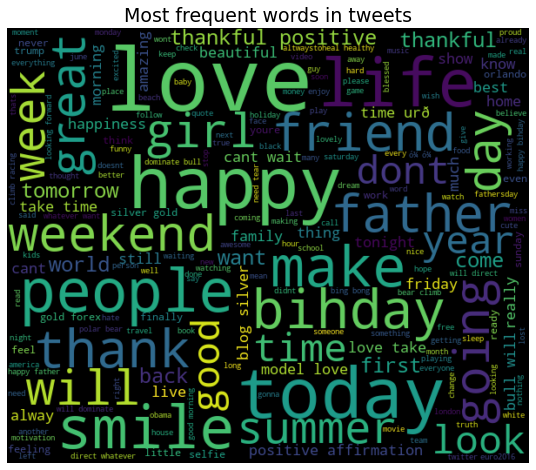

In [271]:
# visualize the frequent words
all_words = " ".join([sentence for sentence in df['clean_tweet']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=600, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in tweets', fontsize=19)
plt.show()

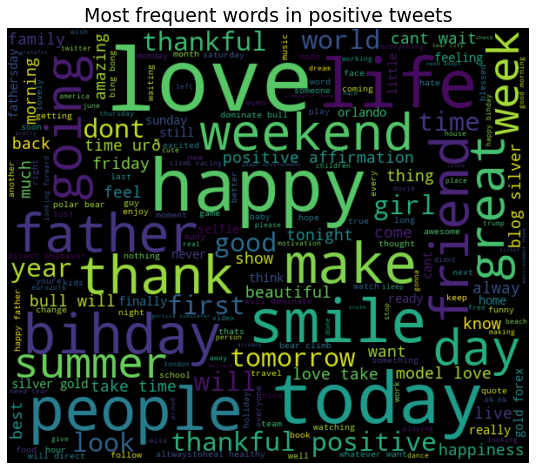

In [272]:
# frequent words visualization for +ve
all_words = " ".join([sentence for sentence in df['clean_tweet'][df['label']==0]])

wordcloud = WordCloud(width=600, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in positive tweets', fontsize=19)
plt.show()

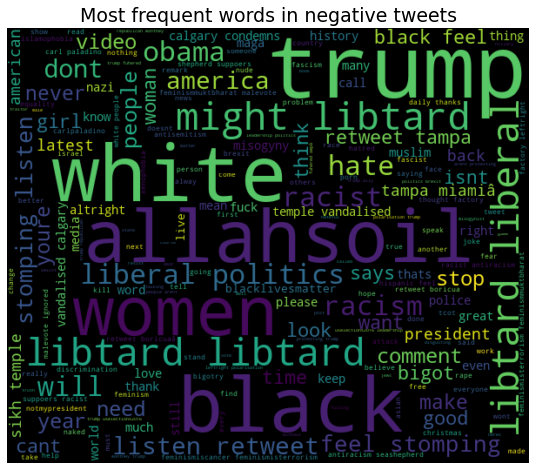

In [273]:
# frequent words visualization for -ve
all_words = " ".join([sentence for sentence in df['clean_tweet'][df['label']==1]])

wordcloud = WordCloud(width=600, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in negative tweets', fontsize=19)
plt.show()

In [274]:
# extract the hashtag
def hashtag_extract(tweets):
    hashtags = []
    # loop words in the tweet
    for tweet in tweets:
        ht = re.findall(r"#(\w+)", tweet)
        hashtags.append(ht)
    return hashtags   

In [275]:
# extract hashtags from non-racist/sexist tweets
ht_positive = hashtag_extract(df['tweet'][df['label']==0])

# extract hashtags from racist/sexist tweets
ht_negative = hashtag_extract(df['tweet'][df['label']==1])

In [276]:
ht_positive = sum(ht_positive, [])
ht_negative = sum(ht_negative, [])

In [277]:
ht_positive[:5]

['run', 'lyft', 'disapointed', 'getthanked', 'model']

In [278]:
freq = nltk.FreqDist(ht_positive)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,run,33
1,lyft,2
2,disapointed,1
3,getthanked,2
4,model,364


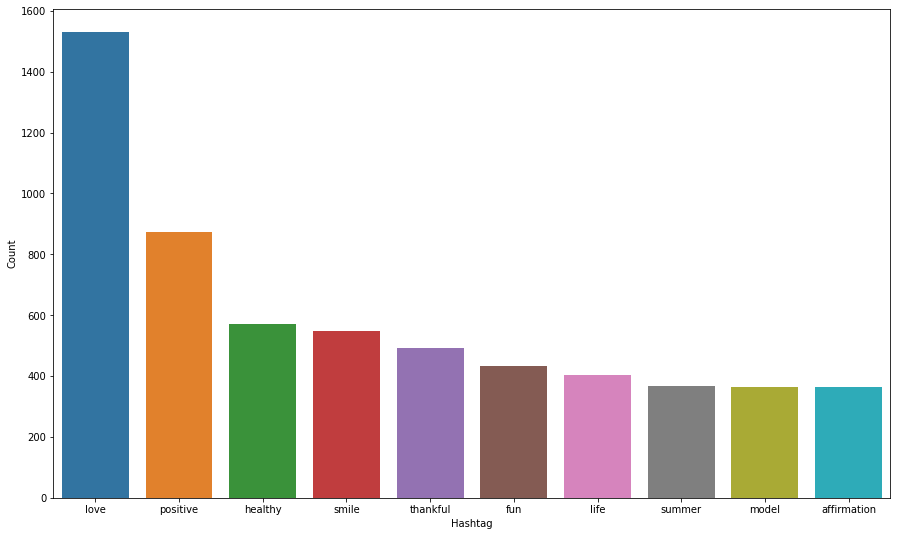

In [279]:
# select top 10 hashtags
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.show()

In [280]:
freq = nltk.FreqDist(ht_negative)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,cnn,9
1,michigan,2
2,tcot,14
3,australia,6
4,opkillingbay,2


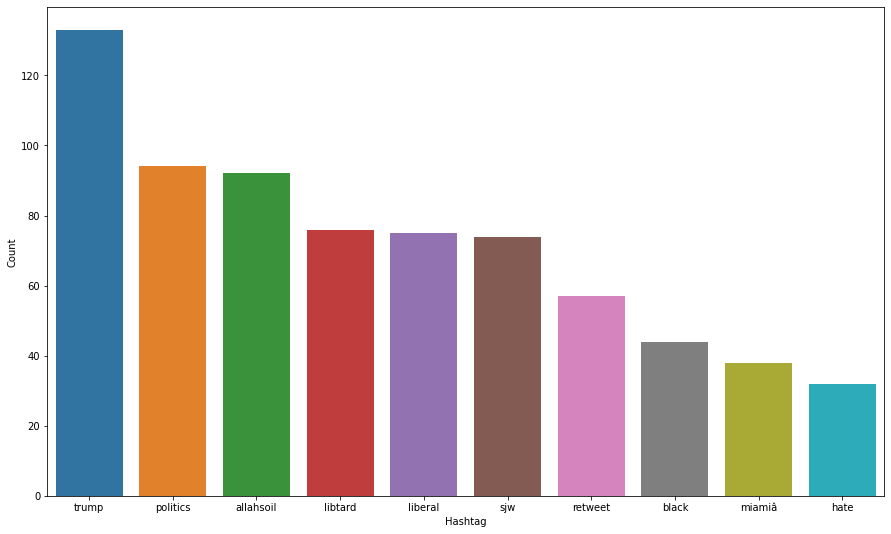

In [281]:
# select top 10 hashtags
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.show()

In [282]:
# feature extraction
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(df['clean_tweet'])
output_data = df['label']


In [283]:
from sklearn.model_selection import train_test_split


0    12924
1      998
Name: label, dtype: int64


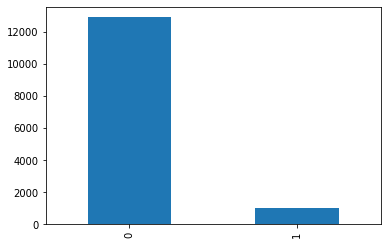

In [284]:
x_train, x_test, y, y_test = train_test_split(bow, output_data, test_size=0.34, random_state=0)
    
# TODO: split (X, y)
x_train, X_val, y_train, y_val = train_test_split(x_train, y, test_size=0.34, random_state=0)
y_test.loc[y_test==1].sum()

print(y_train.value_counts())
y_train.value_counts().plot.bar()

0    1996
1     998
Name: label, dtype: int64


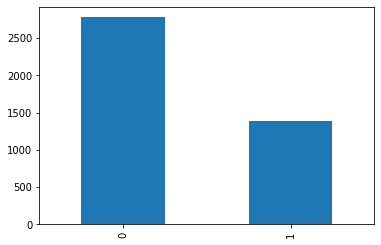

In [285]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy=0.5, random_state=0)
x_train_balanced, y_train_balanced = rus.fit_resample(x_train, y_train)
print(y_train_balanced.value_counts())
y_train_balaned.value_counts().plot.bar()

0    1996
1    1996
Name: label, dtype: int64


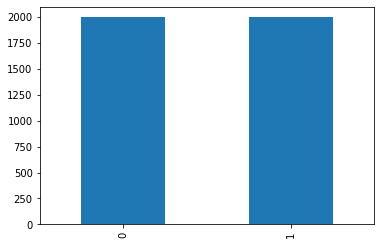

In [286]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy=1.0, random_state=0)
x_train_balanced_over, y_train_balanced_over = ros.fit_resample(x_train_balanced, y_train_balanced)

print(y_train_balanced_over.value_counts())
y_train_balanced_over.value_counts().plot.bar()

In [287]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

def eval_model(model, x_train, y_train):
    model.fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    acc = accuracy_score(y_train, y_pred_train)
    return acc


In [288]:
LG=LogisticRegression(random_state=6)
acc=eval_model(LG, x_train, y_train)
print(acc)


0.9508691279988507


In [289]:
# use probability to get output
pred_prob = LG.predict_proba(x_test)
pred = pred_prob[:, 1] >= 0.3
pred = pred.astype(np.int)

f1_score(y_test, pred)

0.5091779728651237

In [290]:
pred_prob[0][1] >= 0.3

False